<a href="https://colab.research.google.com/github/prajwalDU/RainFall_Prediction/blob/main/Log9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainfall Prediction is the application area of data science and machine learning to predict the state of the atmosphere. It is important to predict the rainfall intensity for effective use of water resources and crop production to reduce mortality due to flood and any disease caused by rain.

In [33]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [34]:
# Importing dataset
path = '/content/drive/MyDrive/almabetter/Log9/Meteo.csv'

df = pd.read_csv(path)

In [35]:
# Checking first 5 rows of dataset
df.head()

,time,relativehumidity_2m (%),dewpoint_2m (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),windspeed_100m (km/h),vapor_pressure_deficit (kPa),precipitation (mm),rain (mm)
0,2020-02-16T00:00,46.0,7.7,1015.5,921.3,28.0,26.9,1.23,0.0,0.0
1,2020-02-16T01:00,50.0,8.3,1015.2,920.5,27.0,26.4,1.09,0.0,0.0
2,2020-02-16T02:00,54.0,8.7,1014.7,919.9,26.0,26.1,0.98,0.0,0.0
3,2020-02-16T03:00,55.0,8.6,1014.7,919.5,26.0,25.9,0.93,0.0,0.0
4,2020-02-16T04:00,55.0,8.1,1014.4,919.2,27.0,24.9,0.90,0.0,0.0


In [36]:
# Checking last 5 rows of dataset
df.tail()

,time,relativehumidity_2m (%),dewpoint_2m (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),windspeed_100m (km/h),vapor_pressure_deficit (kPa),precipitation (mm),rain (mm)
26323,2023-02-16T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26324,2023-02-16T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26325,2023-02-16T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26326,2023-02-16T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26327,2023-02-16T23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df.rename(columns={'relativehumidity_2m (%)': 'relativehumidity', 'dewpoint_2m (°C)': 'dewpoint', 'pressure_msl (hPa)': 'pressure',
                        'surface_pressure (hPa)': 'surface_pressure', 'cloudcover (%)': 'cloudcover', 'windspeed_100m (km/h)': 'windspeed',
                        'vapor_pressure_deficit (kPa)' : 'vapor_pressure_deficit', 'precipitation (mm)' : 'precipitation', 'rain (mm)' : 'rain'})

In [38]:
df.head()

,time,relativehumidity,dewpoint,pressure,surface_pressure,cloudcover,windspeed,vapor_pressure_deficit,precipitation,rain
0,2020-02-16T00:00,46.0,7.7,1015.5,921.3,28.0,26.9,1.23,0.0,0.0
1,2020-02-16T01:00,50.0,8.3,1015.2,920.5,27.0,26.4,1.09,0.0,0.0
2,2020-02-16T02:00,54.0,8.7,1014.7,919.9,26.0,26.1,0.98,0.0,0.0
3,2020-02-16T03:00,55.0,8.6,1014.7,919.5,26.0,25.9,0.93,0.0,0.0
4,2020-02-16T04:00,55.0,8.1,1014.4,919.2,27.0,24.9,0.90,0.0,0.0


In [40]:
# Check the shape of dataset
df.shape

(26328, 10)

In [41]:
# To get easy way to familiar with dataset is checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26328 entries, 0 to 26327
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    26328 non-null  object 
 1   relativehumidity        26213 non-null  float64
 2   dewpoint                26213 non-null  float64
 3   pressure                26213 non-null  float64
 4   surface_pressure        26213 non-null  float64
 5   cloudcover              26213 non-null  float64
 6   windspeed               26213 non-null  float64
 7   vapor_pressure_deficit  26213 non-null  float64
 8   precipitation           26213 non-null  float64
 9   rain                    26213 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.0+ MB


In [42]:
# Another way to get familiar with dataset is checking describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
relativehumidity,26213.0,72.117499,21.685022,13.0,59.00,77.0,91.0,100.00
dewpoint,26213.0,16.380510,3.999720,-2.6,14.50,18.0,19.2,22.30
pressure,26213.0,1011.257319,3.102917,1001.5,1009.00,1011.1,1013.5,1021.60
surface_pressure,26213.0,917.974455,2.538704,909.5,916.20,918.0,919.8,927.00
cloudcover,26213.0,51.839545,35.925161,0.0,20.00,49.0,89.0,100.00
windspeed,26213.0,17.815290,7.465613,0.0,12.60,17.7,22.5,53.10
vapor_pressure_deficit,26213.0,0.911057,0.913528,0.0,0.21,0.6,1.3,4.84
precipitation,26213.0,0.133003,0.498394,0.0,0.00,0.0,0.0,11.90
rain,26213.0,0.133003,0.498394,0.0,0.00,0.0,0.0,11.90


In [43]:
# Checking null values in all variabels
df.isnull().sum()

time                        0
relativehumidity          115
dewpoint                  115
pressure                  115
surface_pressure          115
cloudcover                115
windspeed                 115
vapor_pressure_deficit    115
precipitation             115
rain                      115
dtype: int64

In [44]:
# Filling null with median to all columns
df = df.fillna(method='ffill')

In [45]:
# Verifying null values again to confirm
df.isnull().sum()

time                      0
relativehumidity          0
dewpoint                  0
pressure                  0
surface_pressure          0
cloudcover                0
windspeed                 0
vapor_pressure_deficit    0
precipitation             0
rain                      0
dtype: int64

# EDA

In [46]:
# Checking time column data type
type(df['time'][0])

str

In [47]:
# Converting time variable string to datetime type
df['time']=pd.to_datetime(df['time'])

In [48]:
# Creating new features from time column
df['month'] = df['time'].apply(lambda x : x.month)
df['week_number'] = df['time'].dt.strftime("%U")

In [49]:
# Converting Dat_number datetime type to int
df['week_number'] = df['week_number'].astype(int)

In [50]:
# Set index as time column
df.set_index('time',inplace=True)

In [51]:
df.resample('D').mean()

,relativehumidity,dewpoint,pressure,surface_pressure,cloudcover,windspeed,vapor_pressure_deficit,precipitation,rain,month,week_number
time,,,,,,,,,,,
2020-02-16,34.750000,5.495833,1015.033333,921.516667,7.125000,20.400000,2.036250,0.0,0.0,2.0,7.0
2020-02-17,40.875000,4.795833,1016.020833,922.083333,0.208333,19.229167,1.853750,0.0,0.0,2.0,7.0
2020-02-18,44.625000,7.962500,1015.708333,921.854167,8.250000,20.466667,1.694583,0.0,0.0,2.0,7.0
2020-02-19,53.916667,10.862500,1015.062500,921.312500,13.916667,19.029167,1.517500,0.0,0.0,2.0,7.0
2020-02-20,50.416667,8.545833,1014.895833,921.129167,2.416667,20.150000,1.609167,0.0,0.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-12,61.458333,9.229167,1014.533333,918.904167,29.166667,19.329167,0.726250,0.0,0.0,2.0,7.0
2023-02-13,63.000000,9.400000,1014.400000,918.700000,29.000000,19.100000,0.680000,0.0,0.0,2.0,7.0
2023-02-14,63.000000,9.400000,1014.400000,918.700000,29.000000,19.100000,0.680000,0.0,0.0,2.0,7.0


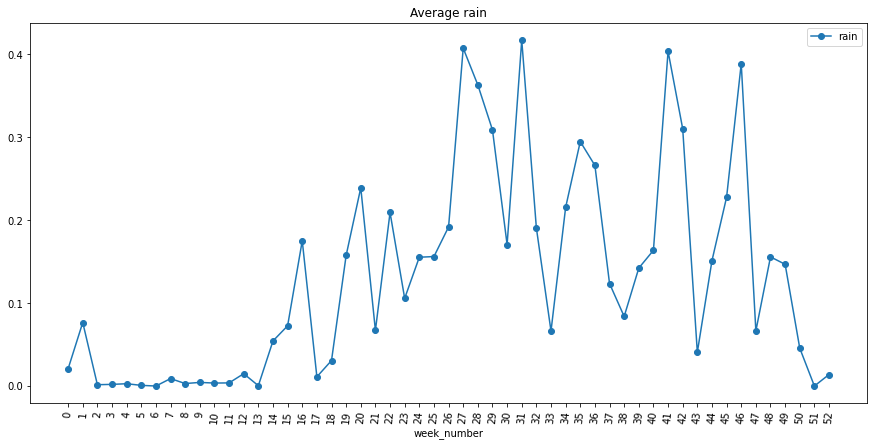

In [53]:
#ploting line graph
# group by week and get average rainfall
avg_rainfall = df.groupby('week_number')['rain'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(15,7))
a=avg_rainfall.plot(legend=True,marker='o',title="Average rain")
a.set_xticks(range(len(avg_rainfall)));
a.set_xticklabels(avg_rainfall.index.tolist(), rotation=85);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

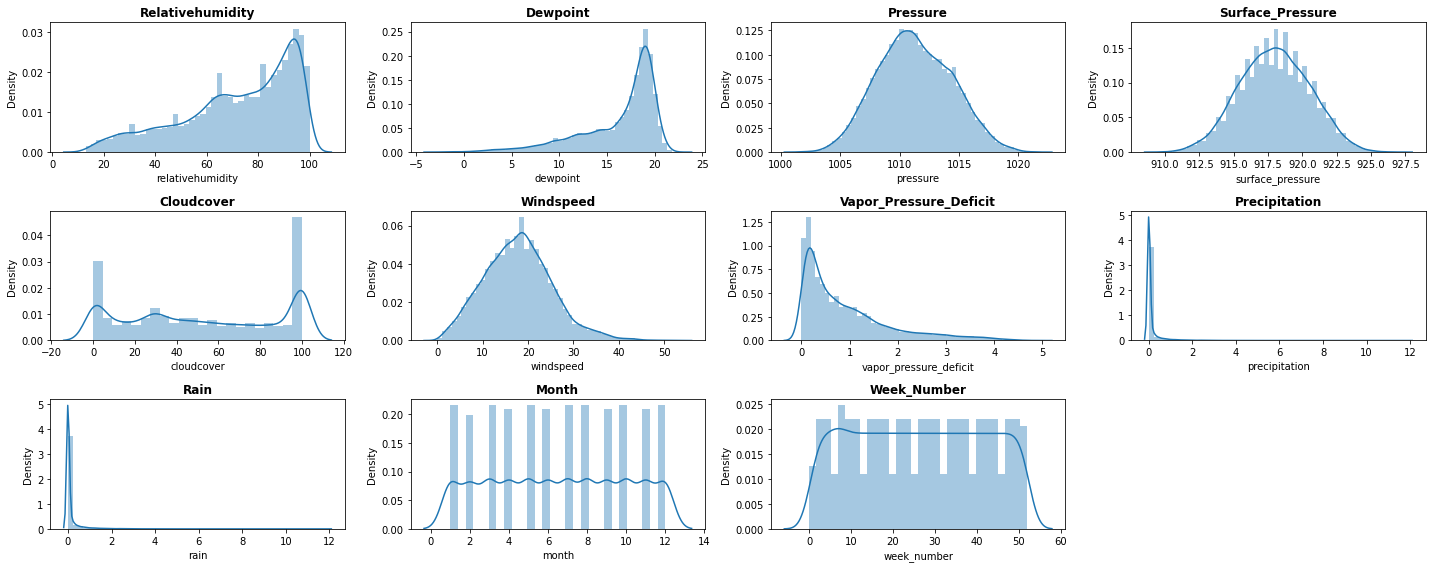

In [54]:
# Visualizing the distribution
plt.figure(figsize=(20,8))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

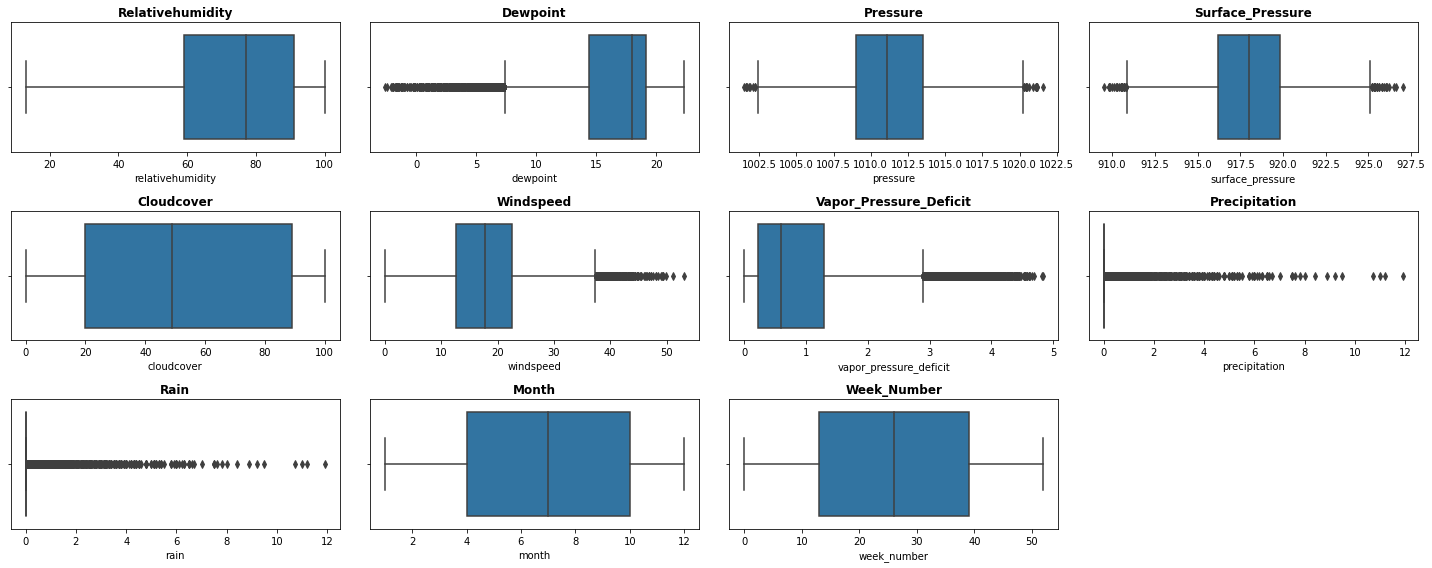

In [55]:
# Visiualizing in boxplot is easyway to find outliers in our dataset
plt.figure(figsize=(20,8))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

relativehumidity


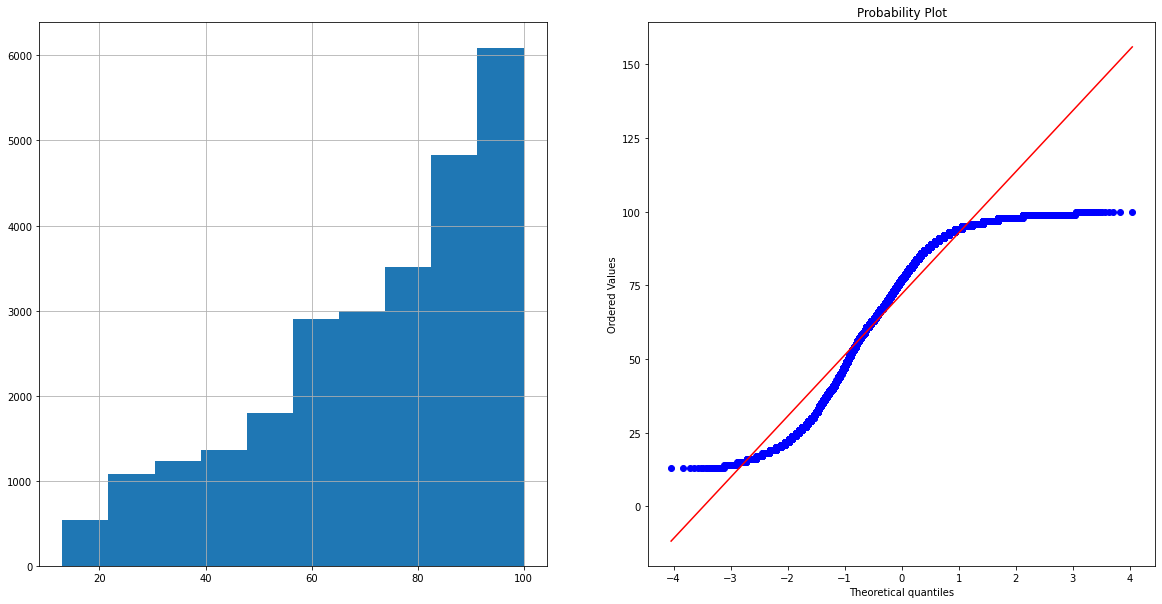

dewpoint


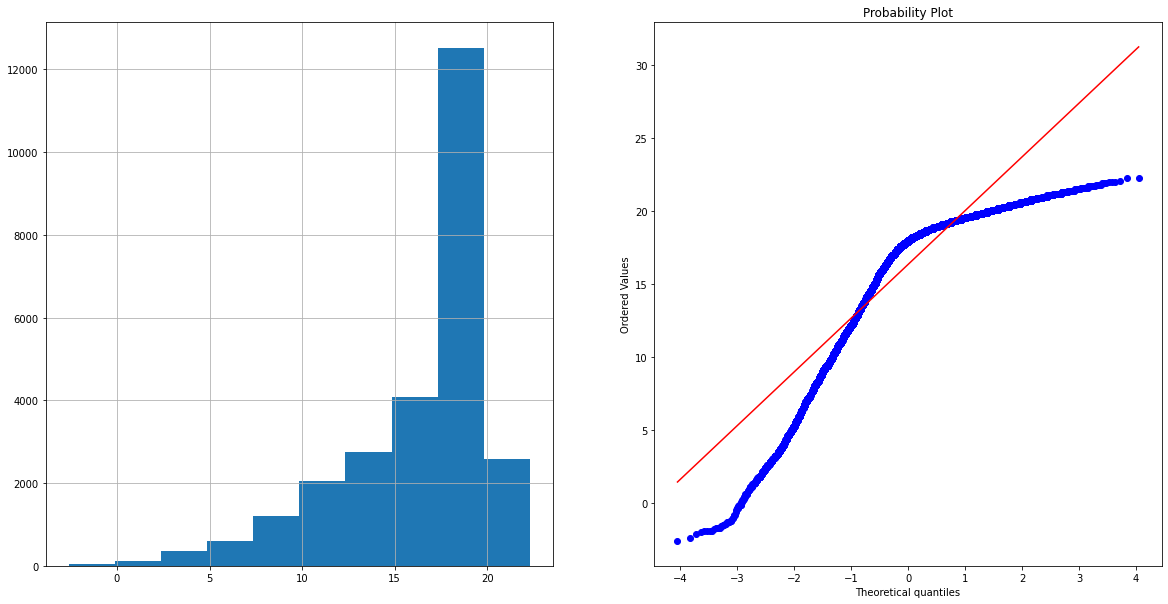

pressure


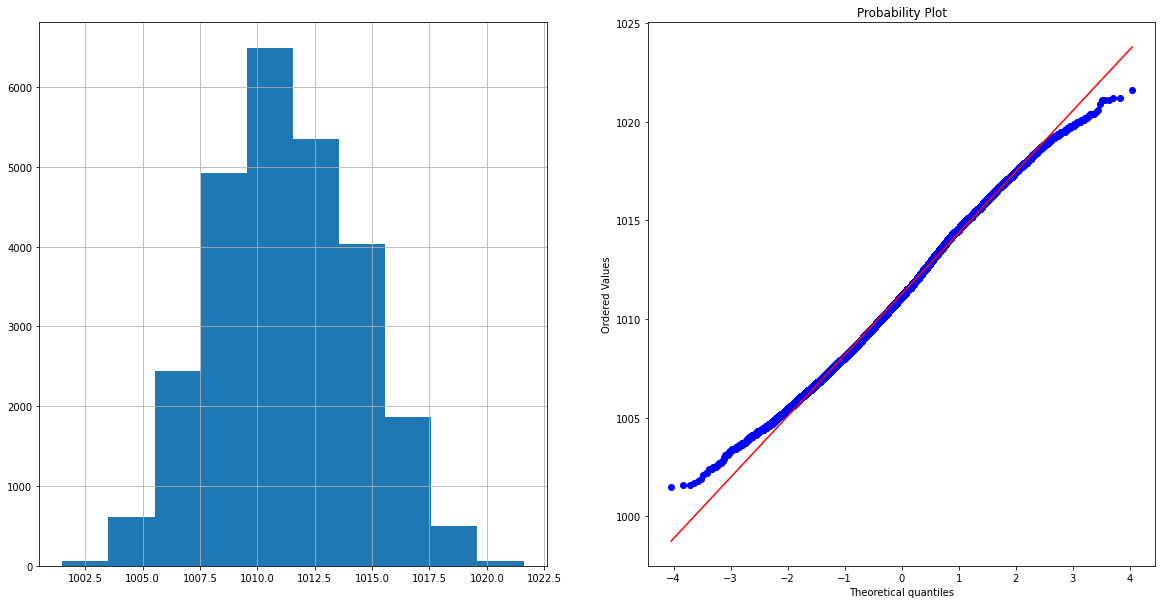

surface_pressure


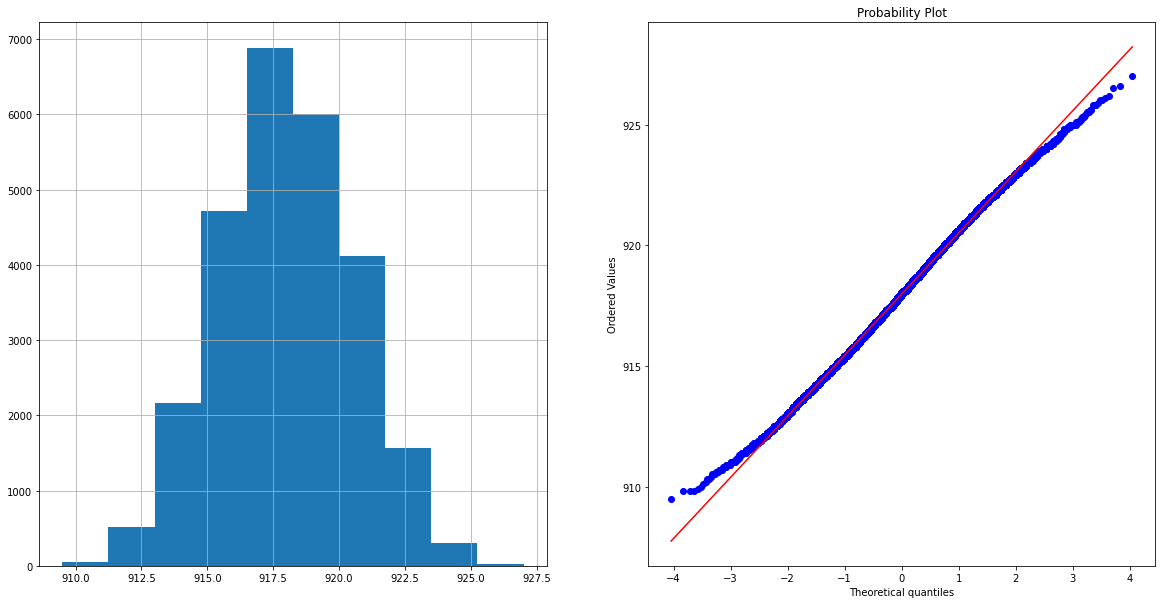

cloudcover


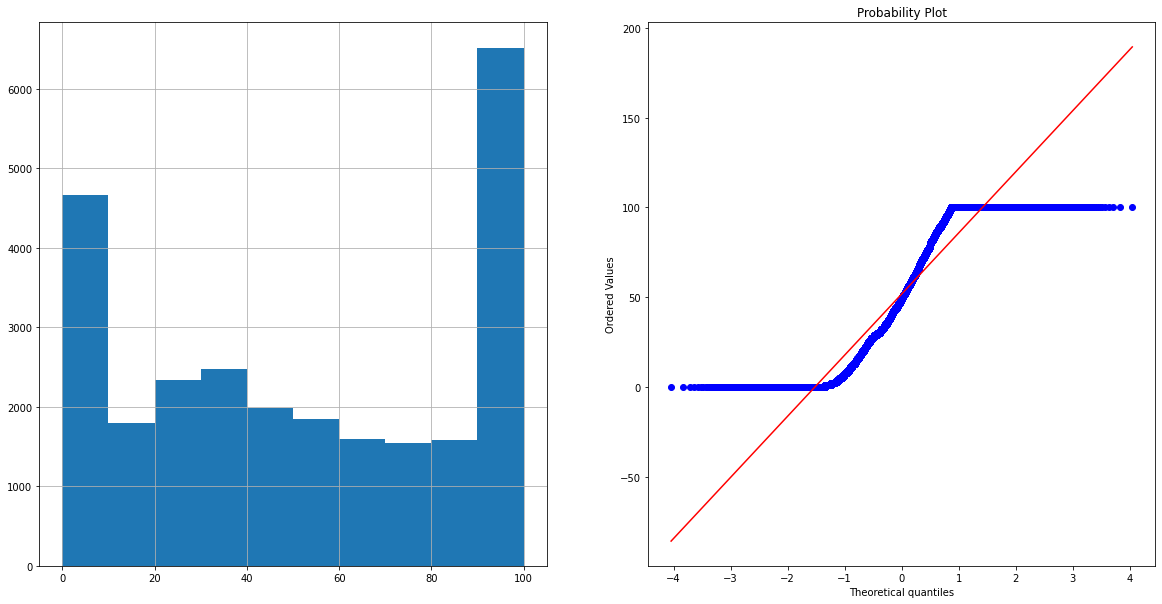

windspeed


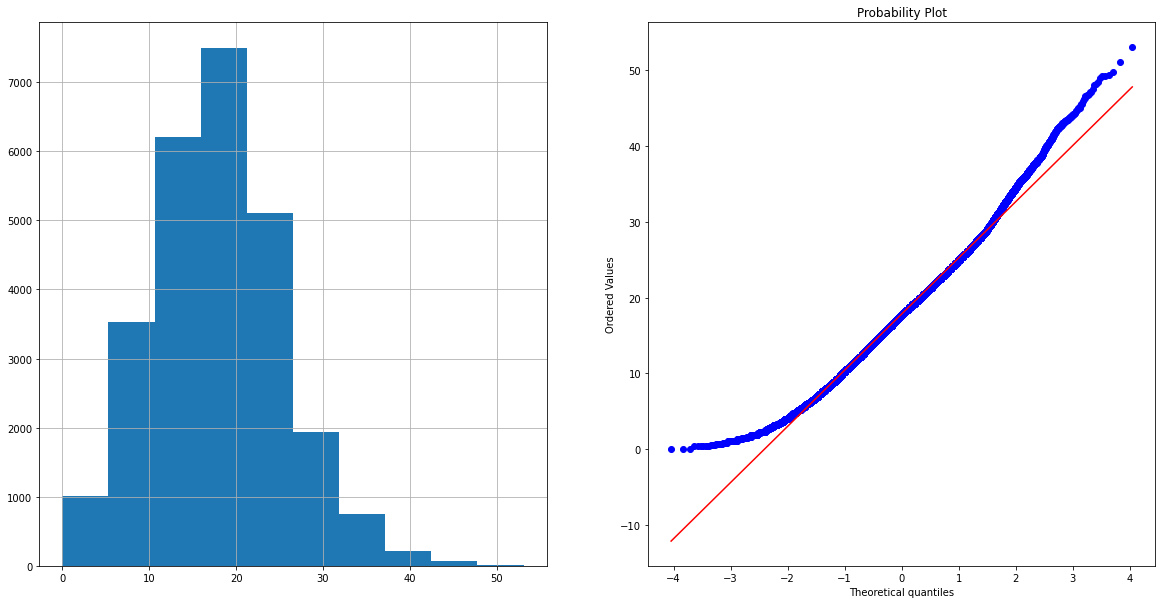

vapor_pressure_deficit


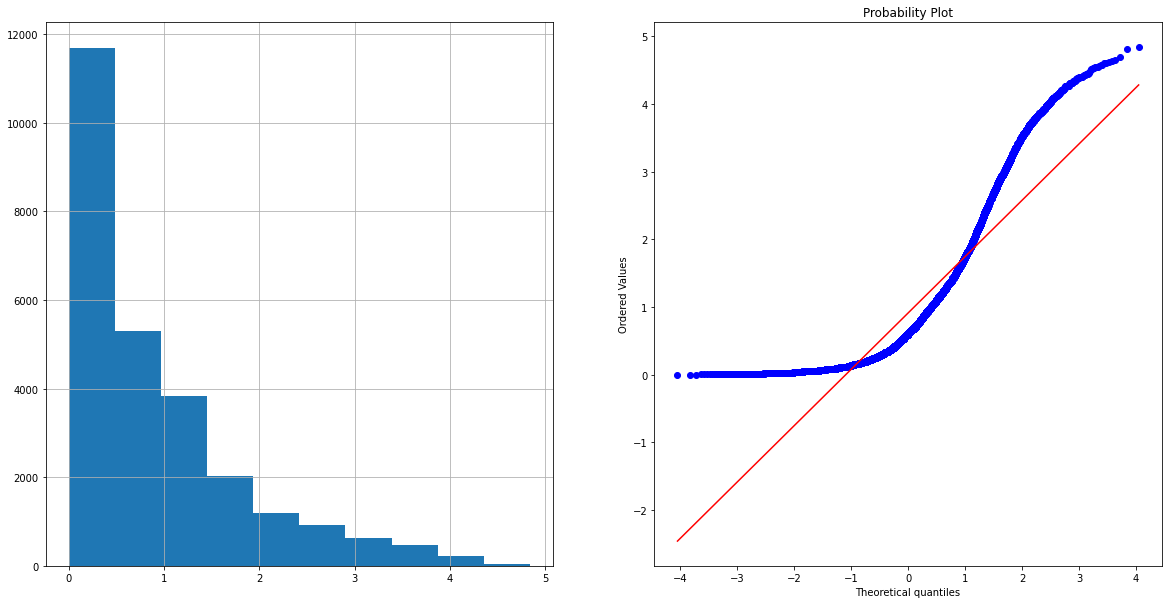

precipitation


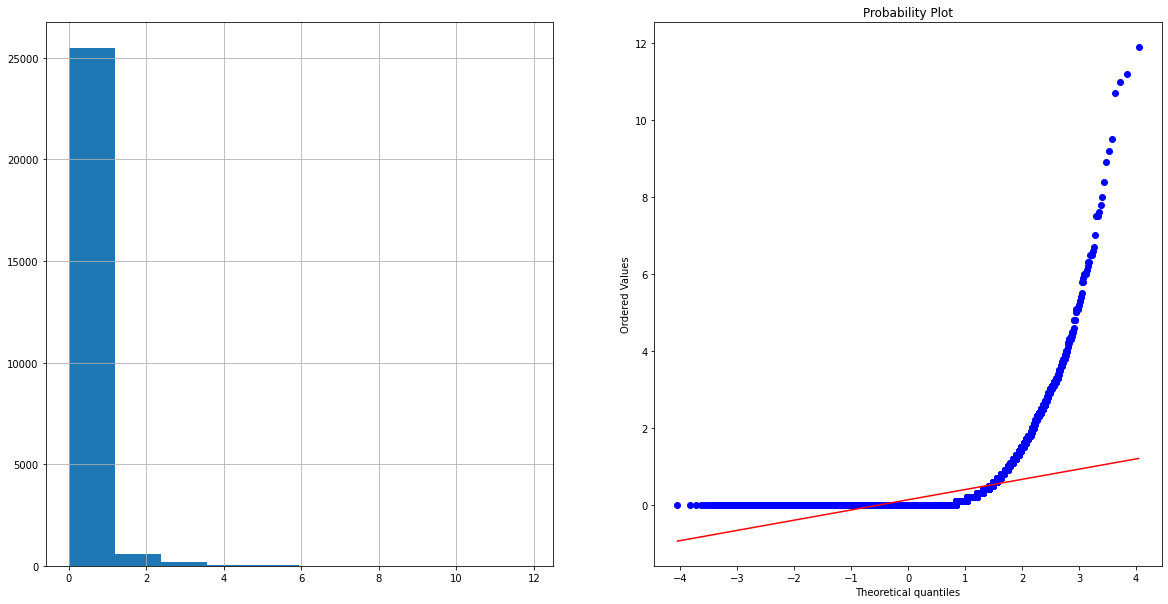

rain


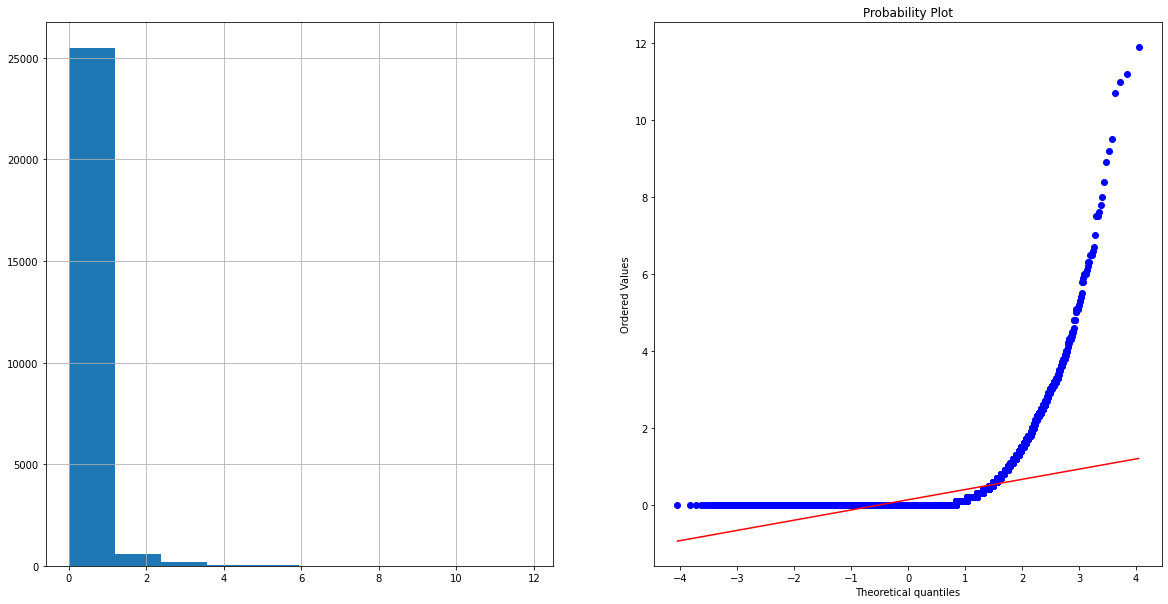

month


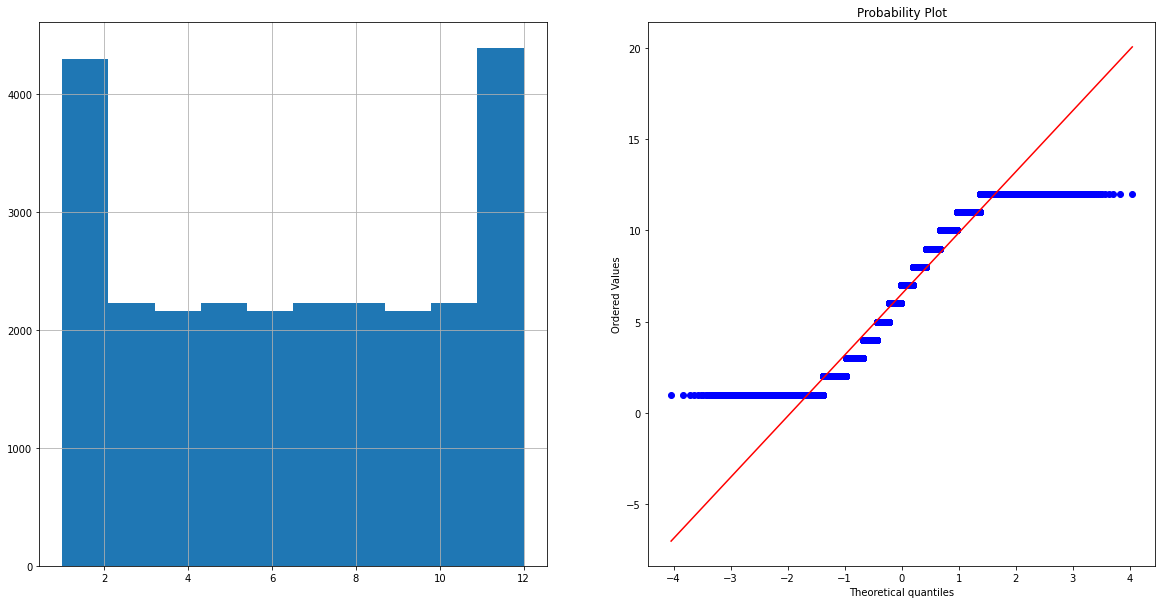

week_number


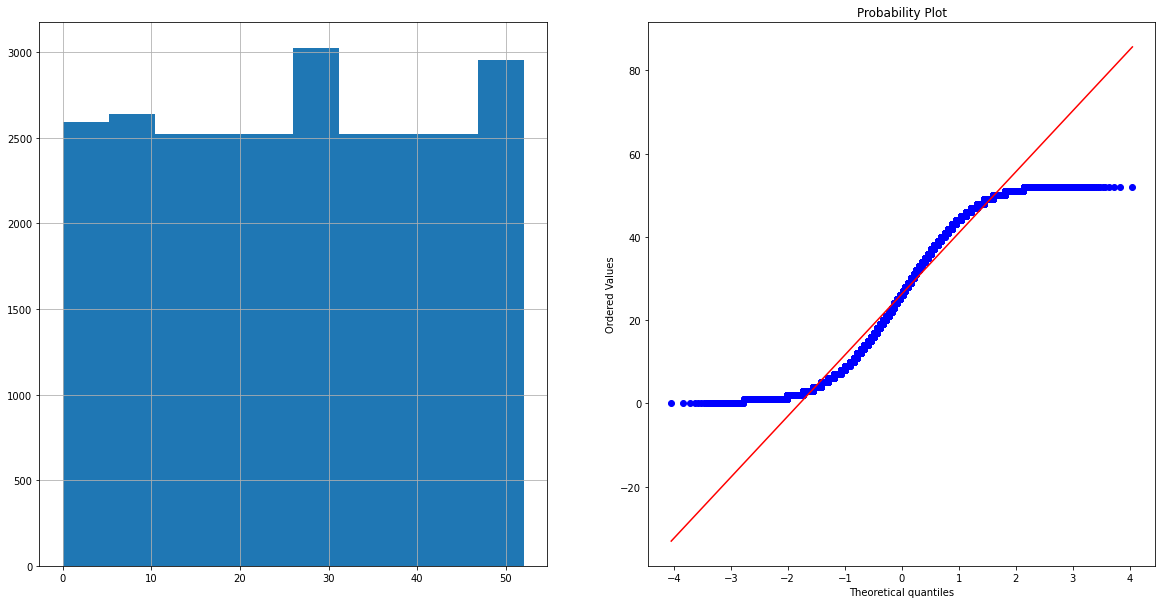

In [56]:
# Plottimg probability plot
for feature in df:
    print(feature)
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

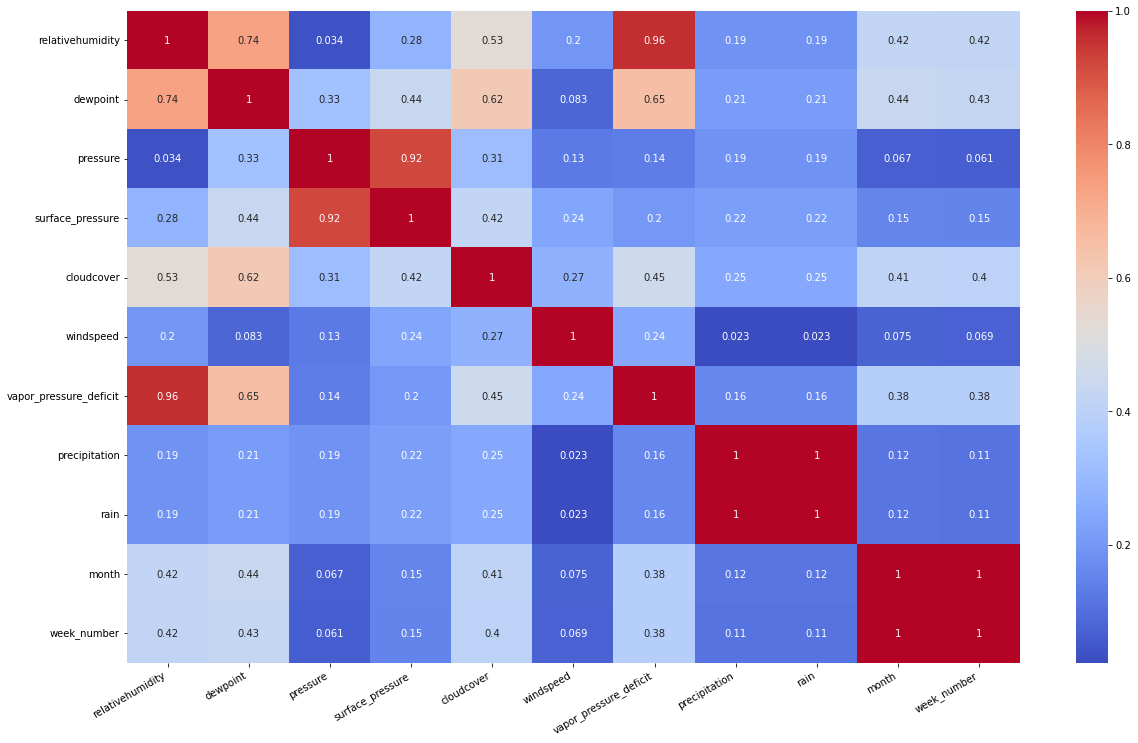

In [57]:
# Check corelations with heatmap
plt.figure(figsize=(20,12))
plot = sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Consider time series models: Time series models like ARIMA, SARIMA, or VAR can account for the dynamics of the time series and the potential for multicollinearity. These models can help to model the relationships between the variables more effectively and account for the time-dependent nature of the data.

We can now use the ARIMA class from the statsmodels library to fit an ARIMA model to the data. We'll use a standard ARIMA(1,1,1) model, which includes one autoregressive term, one differencing term, and one moving average term:

# Create a Linear Regression model

In [74]:
from statsmodels.regression import linear_model
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA as ARIMA
import statsmodels.api as sm

In [59]:
dataset_len = len(df)
split_index = round(dataset_len*0.9)
train_set_end_date = df.index[split_index]
df_train = df.loc[df.index <= train_set_end_date].copy()
df_test = df.loc[df.index > train_set_end_date].copy()

In [60]:
df.columns

Index(['relativehumidity', 'dewpoint', 'pressure', 'surface_pressure',
       'cloudcover', 'windspeed', 'vapor_pressure_deficit', 'precipitation',
       'rain', 'month', 'week_number'],
      dtype='object')

In [61]:
expr = 'rain ~  + precipitation + relativehumidity + dewpoint'

In [62]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [63]:
olsr_results = linear_model.OLS(y_train, X_train).fit()

In [64]:
olsr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rain   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.943e+30
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:06:15   Log-Likelihood:             7.2148e+05
No. Observations:               23696   AIC:                        -1.443e+06
Df Residuals:                   23692   BIC:                        -1.443e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.589e-14   4.15e-16    -38.245      0.000   -1.67e-14   -1.51e-14
precipitation        1.0000   1.87e-16   5.33e+15      0.000       1.000       1.000
relativehumidity  2.519e-17   6.62e-18      3.804      0.000    1.22e-17    3.82e-17
dewpoint         -3.957e-17   3.67e-17     -1.078      0.281   -1.12e-16    3.24e-17
==============================================================================
Omnibus:                    27291.347   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4237814.532
Skew:                          -5.915   Prob(JB):                         0.00
Kurtosis:                      67.438   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Estimate (S)ARIMA parameters (p,d,q), (P,D,Q) and m

We now begin the process of estimating the parameters of the SARIMA model on the OLSR model’s residual errors of regression ε. The regression errors are stored in the variable olsr_results.resid.

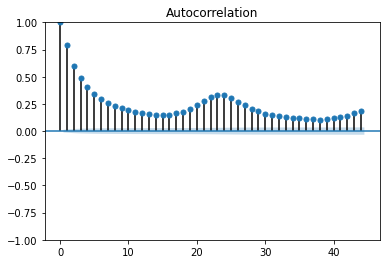

In [65]:
tsa.plot_acf(olsr_results.resid, alpha=0.05)
plt.show()

The ACF tells us three things:

1 There are strong auto-correlations extending out to multiple lags indicating that the residual errors time series has a trend. We’ll need to de-trend this time series by using one or possibly 2 orders of differencing. Thus, the parameter d is likely to be 1, or possibly. 

2 The wavelike pattern in the ACF evidences a seasonal variation in the data.

3 The peak at LAG = 24 indicates that the seasonal period is likely to be 24 hours. i.e. m is likely to be 24. This seems reasonable for data containing vehicular pollution measurements. We’ll soon verify this guess using the time series decomposition plot.

In [66]:
olsr_resid_diff_1 = olsr_results.resid.diff()
olsr_resid_diff_1 = olsr_resid_diff_1.dropna()

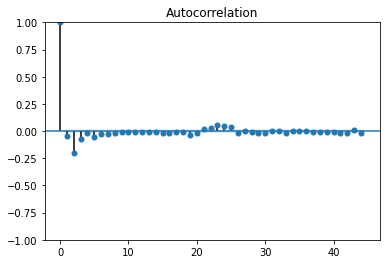

In [67]:
tsa.plot_acf(olsr_resid_diff_1, alpha=0.05)
plt.show()

We now see a very different picture in the ACF. The auto-correlations are significantly reduced at all lags. The wavelike pattern still exists but that’s because we did nothing to remove the possible seasonal variation. The LAG-24 auto-correlation is once again especially prominent.

We see that there is still a significant auto-correlation at LAG-1 in the differenced time series. We could try extinguishing it by taking one more difference, i.e. d=2 and plotting the resulting time series’ ACF:

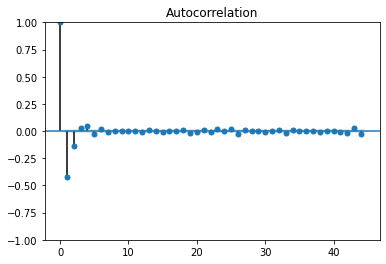

In [68]:
olsr_resid_diff_2 = olsr_resid_diff_1.diff()
olsr_resid_diff_2 = olsr_resid_diff_2.dropna()
tsa.plot_acf(olsr_resid_diff_2, alpha=0.05)
plt.show()

Unfortunately, diff-ing the time series a second time has produced a heavy negative auto-correlation at LAG-1. This is bad sign. We seem to have over-done the differencing. We should stick with d=1.

The single positive auto-correlation at LAG-1 indicates that we may want to fix the AR order p to 1. i.e. an AR(1) model.

Since we have fixed p to 1, for now, we’ll leave out the MA portion of the model. i.e. we fix q to 0. i.e. our SARIMA model will not have an MA component.

So far we have the following: p=1, d=1, q=0

Let’s verify that the seasonal period m is 24 hours. To do that, we’ll decompose the residual errors of regression into trend, seasonality and noise by using the seasonal_decompose() function provided by statsmodel

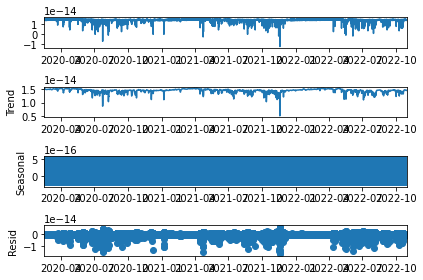

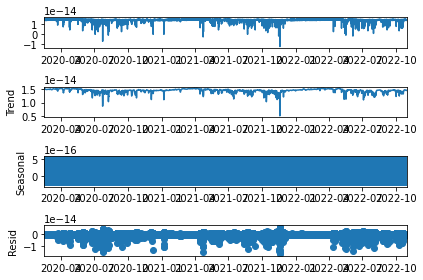

In [69]:
components = seasonal_decompose(olsr_results.resid)
components.plot()

# Build and fit the Regression Model with Seasonal ARIMA errors

In [72]:
X_train_minus_intercept = X_train.drop('Intercept', axis=1)
X_train_minus_intercept = X_train_minus_intercept.asfreq('D')
 
y_train = y_train.asfreq('D')

In [75]:
sarimax_model = ARIMA(endog=y_train, exog=X_train_minus_intercept,order=(1,1,0), seasonal_order=(0,1,1,24))
sarimax_results = sarimax_model.fit()
sarimax_results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               rain   No. Observations:                  988
Model:             ARIMA(1, 1, 0)x(0, 1, [1], 24)   Log Likelihood                9357.015
Date:                            Sun, 19 Feb 2023   AIC                         -18702.031
Time:                                    11:22:37   BIC                         -18672.811
Sample:                                02-16-2020   HQIC                        -18690.905
                                     - 10-30-2022                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
precipitation        1.0000   9.82e-07   1.02e+06      0.000       1.000       1.000
relativehumidity -1.105e-06   6.66e-08    -16.588      0.000   -1.24e-06   -9.74e-07
dewpoint         -1.338e-08   3.41e-07     -0.039      0.969   -6.82e-07    6.55e-07
ar.L1               -0.1680   3.43e-13   -4.9e+11      0.000      -0.168      -0.168
ma.S.L24            -0.7171   2.18e-12  -3.28e+11      0.000      -0.717      -0.717
sigma2             1.17e-10   7.16e-11      1.633      0.102   -2.34e-11    2.57e-10
===================================================================================
Ljung-Box (L1) (Q):                  16.07   Jarque-Bera (JB):               266.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.19
Prob(H) (two-sided):                  0.33   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.83e+27. Standard errors may be unstable.
"""

# Prediction

In [76]:
X_test_minus_intercept = X_test.drop('Intercept', axis=1)
X_test_minus_intercept = X_test_minus_intercept.asfreq('D')
y_test = y_test.asfreq('D')

In [77]:
predictions = sarimax_results.get_forecast(steps=24, exog=X_test_minus_intercept[:24])
predictions.summary_frame()

rain,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-10-31,1.151679e-05,0.000011,-0.000010,0.000033
2022-11-01,1.809999e-05,0.000014,-0.000009,0.000046
2022-11-02,1.496728e-05,0.000017,-0.000018,0.000048
2022-11-03,3.000040e-01,0.000019,0.299966,0.300042
2022-11-04,1.999987e-01,0.000021,0.199957,0.200041
2022-11-05,9.830566e-06,0.000023,-0.000036,0.000055
2022-11-06,6.597349e-06,0.000025,-0.000042,0.000056
2022-11-07,1.194887e-05,0.000027,-0.000040,0.000064
2022-11-08,2.370192e-05,0.000028,-0.000032,0.000079
2022-11-09,3.017833e-05,0.000030,-0.000028,0.000088


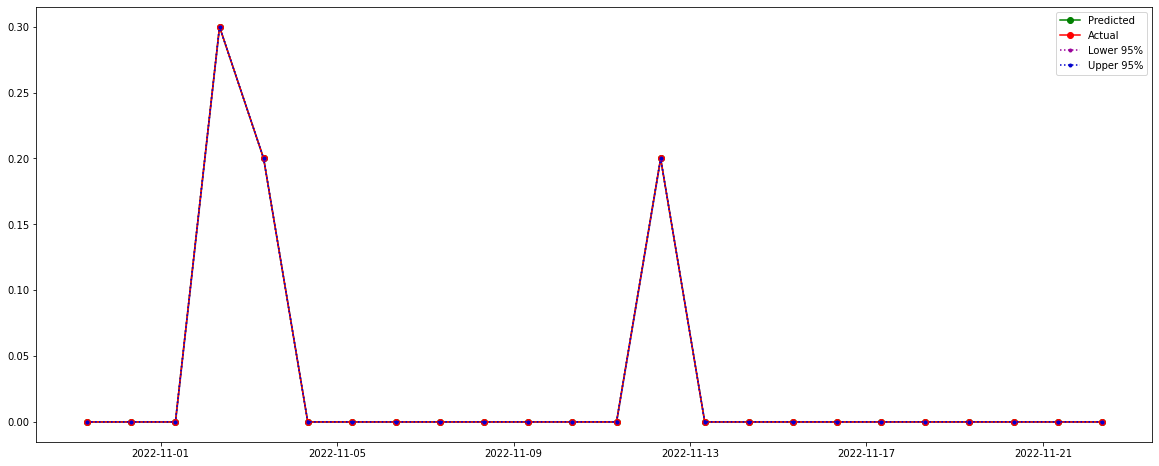

In [79]:
plt.figure(figsize=(20,8))

predicted, = plt.plot(X_test_minus_intercept[:24].index, predictions.summary_frame()['mean'], 'go-', label='Predicted')
 
actual, = plt.plot(X_test_minus_intercept[:24].index, y_test[:24], 'ro-', label='Actual')
 
lower, = plt.plot(X_test_minus_intercept[:24].index, predictions.summary_frame()['mean_ci_lower'], color='#990099', marker='.', linestyle=':', label='Lower 95%')
 
upper, = plt.plot(X_test_minus_intercept[:24].index, predictions.summary_frame()['mean_ci_upper'], color='#0000cc', marker='.', linestyle=':', label='Upper 95%')
 
plt.fill_between(X_test_minus_intercept[:24].index, predictions.summary_frame()['mean_ci_lower'], predictions.summary_frame()['mean_ci_upper'], color = 'b', alpha = 0.2)
 
plt.legend(handles=[predicted, actual, lower, upper])
 
plt.show()

Key Takeaways
1 Regression with (Seasonal) ARIMA errors (SARIMAX) is a time series regression model that brings together two powerful regression models namely, Linear Regression, and ARIMA (or Seasonal ARIMA).

2 The Python Statsmodels library provides powerful support for building (S)ARIMAX models via the statsmodels.tsa.arima.model.ARIMA class in v0.12.0 of statsmodels, or via statsmodels.tsa.statespace.sarimax.SARIMAX in v0.13.0.

3 While configuring the (S)ARIMA portion of the (S)ARIMAX model, it helps to use a set of well-known rules (combined with personal judgement) for fixing the values of the p,d,q,P,D,Q and m parameters of the (S)ARIMAX model.

4 A well designed (S)ARIMAX model’s residual errors of regression will have very little auto-correlation. This is indicated by the p value of the Ljung-Box test.

5 Additionally, we would want the residual errors to be homoscedastic, and (preferably) normally distributed. So you may have to experiment with different combinations of p,d,q,P,D,Q until you get a model with the best goodness-of-fit characteristics.